In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # gpu가 있다면...
# if len(gpus) > 0 :
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

In [3]:
# 데이터를 읽어온다.
cell = pd.read_csv('./data/samsung_stock.csv')
cell

,거래일,최고가,최저가,시작가,종가,거래량,수정종가
0,2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
1,2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.647461
2,2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
3,2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.129883
4,2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.812500
...,...,...,...,...,...,...,...
3092,2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.000000
3093,2022-08-16,61600.0,60300.0,60500.0,61000.0,15036727.0,61000.000000
3094,2022-08-17,61200.0,60300.0,61100.0,60400.0,9061518.0,60400.000000
3095,2022-08-18,61900.0,60000.0,60300.0,61500.0,16372754.0,61500.000000


In [4]:
# 불필요한 컬럼을 제거한다.
cell.drop(['거래일', '수정종가'], axis=1, inplace=True)
cell

,최고가,최저가,시작가,종가,거래량
0,16180.0,16000.0,16060.0,16180.0,11950800.0
1,16580.0,16300.0,16520.0,16440.0,27925850.0
2,16820.0,16520.0,16580.0,16820.0,22948850.0
3,16820.0,16260.0,16820.0,16260.0,22107950.0
4,16420.0,16120.0,16400.0,16420.0,14777550.0
...,...,...,...,...,...
3092,60700.0,59400.0,59500.0,60200.0,10786658.0
3093,61600.0,60300.0,60500.0,61000.0,15036727.0
3094,61200.0,60300.0,61100.0,60400.0,9061518.0
3095,61900.0,60000.0,60300.0,61500.0,16372754.0


In [5]:
# 입력과 결과로 나눈다.
X = cell.drop('종가', axis=1)
y = cell['종가']

display(X)
display(y)

,최고가,최저가,시작가,거래량
0,16180.0,16000.0,16060.0,11950800.0
1,16580.0,16300.0,16520.0,27925850.0
2,16820.0,16520.0,16580.0,22948850.0
3,16820.0,16260.0,16820.0,22107950.0
4,16420.0,16120.0,16400.0,14777550.0
...,...,...,...,...
3092,60700.0,59400.0,59500.0,10786658.0
3093,61600.0,60300.0,60500.0,15036727.0
3094,61200.0,60300.0,61100.0,9061518.0
3095,61900.0,60000.0,60300.0,16372754.0


0       16180.0
1       16440.0
2       16820.0
3       16260.0
4       16420.0
         ...   
3092    60200.0
3093    61000.0
3094    60400.0
3095    61500.0
3096    60900.0
Name: 종가, Length: 3097, dtype: float64

In [6]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[-1.18299484, -1.17324522, -1.17992113, -0.40244887],
       [-1.16199841, -1.1572267 , -1.15557248,  1.76804556],
       [-1.14940055, -1.14547979, -1.15239656,  1.09183167],
       ...,
       [ 1.18015351,  1.19215642,  1.20412998, -0.79500917],
       [ 1.21689727,  1.1761379 ,  1.16178449,  0.19835216],
       [ 1.20114994,  1.20817495,  1.22000954, -1.09319423]])

In [7]:
scaler2 = MinMaxScaler()
y = scaler2.fit_transform(y.values.reshape(-1,1))
y

array([[0.03333333],
       [0.03669251],
       [0.04160207],
       ...,
       [0.60465116],
       [0.61886305],
       [0.61111111]])

In [8]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series:
    out_nodes = 1
else : 
    out_nodes = y.shape[1]
    
loss_function = 'mean_squared_error'

In [9]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

4

In [10]:
# 시퀀스 데이터셋 구성
# 시퀀스 데이터 : 순서를 가지고 있는 데이터를 의미한다.
def windowed_dataset(series, window_size, batch_size, shuffle):
    # 데이터의 차원을 1차원으로 조정한다.
    series = tf.expand_dims(series, axis=-1)
    # 데이터셋 객체를 생성한다.
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size +1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size + 1))
    if shuffle == True:
        ds = ds.shuffle(1000)
        
    ds = ds.map(lambda w : (w[:1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [11]:
# 시퀀스 데이터셋 구성
# 시퀀스 데이터 : 순서를 가지고 있는 데이터를 의미한다.
def windowed_dataset(series, window_size, batch_size, shuffle) :
    # 데이터의 차원을 1차원으로 조정한다.
    series = tf.expand_dims(series, axis=-1)
    # 데이터셋 객체를 생성한다.
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size + 1))
    if shuffle == True : 
        ds = ds.shuffle(1000)
        
    ds = ds.map(lambda w : (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [22]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

In [22]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [23]:
# 결과를 확인하기 위한 앞선 데이터의 수
WINDOW_SIZE = 20
# 데이터 배치 사이즈
BATCH_SIZE = 32

In [24]:
# train_data는 학습용 데이터셋, test_data는 검증용 데이터 셋
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [25]:
# 신경망 설계
model = Sequential()

# CNN
model.add(Conv1D(32, kernel_size=3, padding='causal', input_shape=[WINDOW_SIZE, 1]))
model.add(Activation('relu'))

# LSTM
model.add(LSTM(16))
model.add(Activation('tanh'))

# 선형
model.add(Dense(16))
model.add(Activation('relu'))

# 출력층
model.add(Dense(out_nodes))
model.add(Activation('sigmoid'))

In [26]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 20, 32)            128       
                                                                 
 activation_4 (Activation)   (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 activation_5 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [27]:
# 학습모델을 저장할 경로
path = './model/07'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [28]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [29]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=50)

In [30]:
history = model.fit(train_data,
                   validation_data=(test_data),
                   epochs=1000000000,
                   callbacks=[call1, call2, call3])

Epoch 1/1000000000
94/94 [==============================] - 5s 17ms/step - loss: 0.0744 - val_loss: 0.0072
Epoch 2/1000000000
94/94 [==============================] - 1s 9ms/step - loss: 0.0368 - val_loss: 0.0015
Epoch 3/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 0.0091 - val_loss: 0.0058
Epoch 4/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 9.6555e-04 - val_loss: 0.0020
Epoch 6/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 7.6845e-04 - val_loss: 8.7410e-04
Epoch 7/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 5.8340e-04 - val_loss: 0.0022
Epoch 8/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 5.6265e-04 - val_loss: 9.8987e-04
Epoch 9/1000000000
94/94 [==============================] - 1s 8ms/step - loss: 4.4443e-04 - val_loss: 0.0014
Epoch 10/10000000

In [31]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [32]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred = best_model.predict(test_data)
pred = pred.reshape(-1)
pred

3/3 [==============================] - 1s 16ms/step


array([0.6972804 , 0.68701994, 0.68415666, 0.668154  , 0.6654746 ,
       0.7030176 , 0.7019446 , 0.70436263, 0.710069  , 0.6899838 ,
       0.67784154, 0.6781375 , 0.6666272 , 0.6901518 , 0.6879067 ,
       0.70571595, 0.71288437, 0.704283  , 0.7108626 , 0.7094058 ,
       0.6893677 , 0.6878926 , 0.6811155 , 0.68984705, 0.70703125,
       0.7031171 , 0.69312954, 0.6944286 , 0.67548805, 0.67240494,
       0.67153525, 0.65063787, 0.6240355 , 0.62225497, 0.6058304 ,
       0.60965014, 0.5959983 , 0.5816685 , 0.58052933, 0.5689448 ,
       0.56687057, 0.5812094 , 0.5859161 , 0.59301436, 0.5734024 ,
       0.5599756 , 0.5504884 , 0.56395197, 0.5652098 , 0.553589  ,
       0.57890123, 0.5848953 , 0.584645  , 0.5749124 , 0.5737975 ,
       0.56734085, 0.60121584, 0.6247884 , 0.6095282 , 0.6037914 ,
       0.62215096, 0.61411566, 0.61092037, 0.6198596 , 0.6212263 ,
       0.62260497, 0.61486   , 0.6137404 , 0.6198874 , 0.61398154,
       0.61666274, 0.6168815 , 0.60749096, 0.5972594 , 0.58611

In [33]:
# 원래 결과를 1차원으로 변환한다.
y_test2 = y_test.reshape(-1)
# 20일치를 가지고 21일째를 예측하기 때문에 앞선 20일은 예측하지 않는다
y_test2 = y_test2[20:]
y_test2

array([0.68087855, 0.67829457, 0.66408269, 0.66149871, 0.69509044,
       0.69379845, 0.69638243, 0.70155039, 0.68346253, 0.67312661,
       0.67312661, 0.6627907 , 0.68346253, 0.68087855, 0.69767442,
       0.70413437, 0.69638243, 0.70284238, 0.70155039, 0.68346253,
       0.68217054, 0.67571059, 0.68346253, 0.69896641, 0.69509044,
       0.68604651, 0.6873385 , 0.67054264, 0.66795866, 0.66666667,
       0.64857881, 0.62661499, 0.62403101, 0.60852713, 0.61111111,
       0.59689922, 0.58268734, 0.58010336, 0.56847545, 0.56589147,
       0.57881137, 0.58397933, 0.59173127, 0.57364341, 0.56072351,
       0.5503876 , 0.5620155 , 0.56330749, 0.55297158, 0.57622739,
       0.58268734, 0.58397933, 0.5749354 , 0.57364341, 0.56718346,
       0.5994832 , 0.62403101, 0.61111111, 0.60594315, 0.62273902,
       0.61627907, 0.61369509, 0.62144703, 0.62273902, 0.62403101,
       0.61757106, 0.61627907, 0.62144703, 0.61627907, 0.61886305,
       0.61886305, 0.60981912, 0.5994832 , 0.5878553 , 0.59819

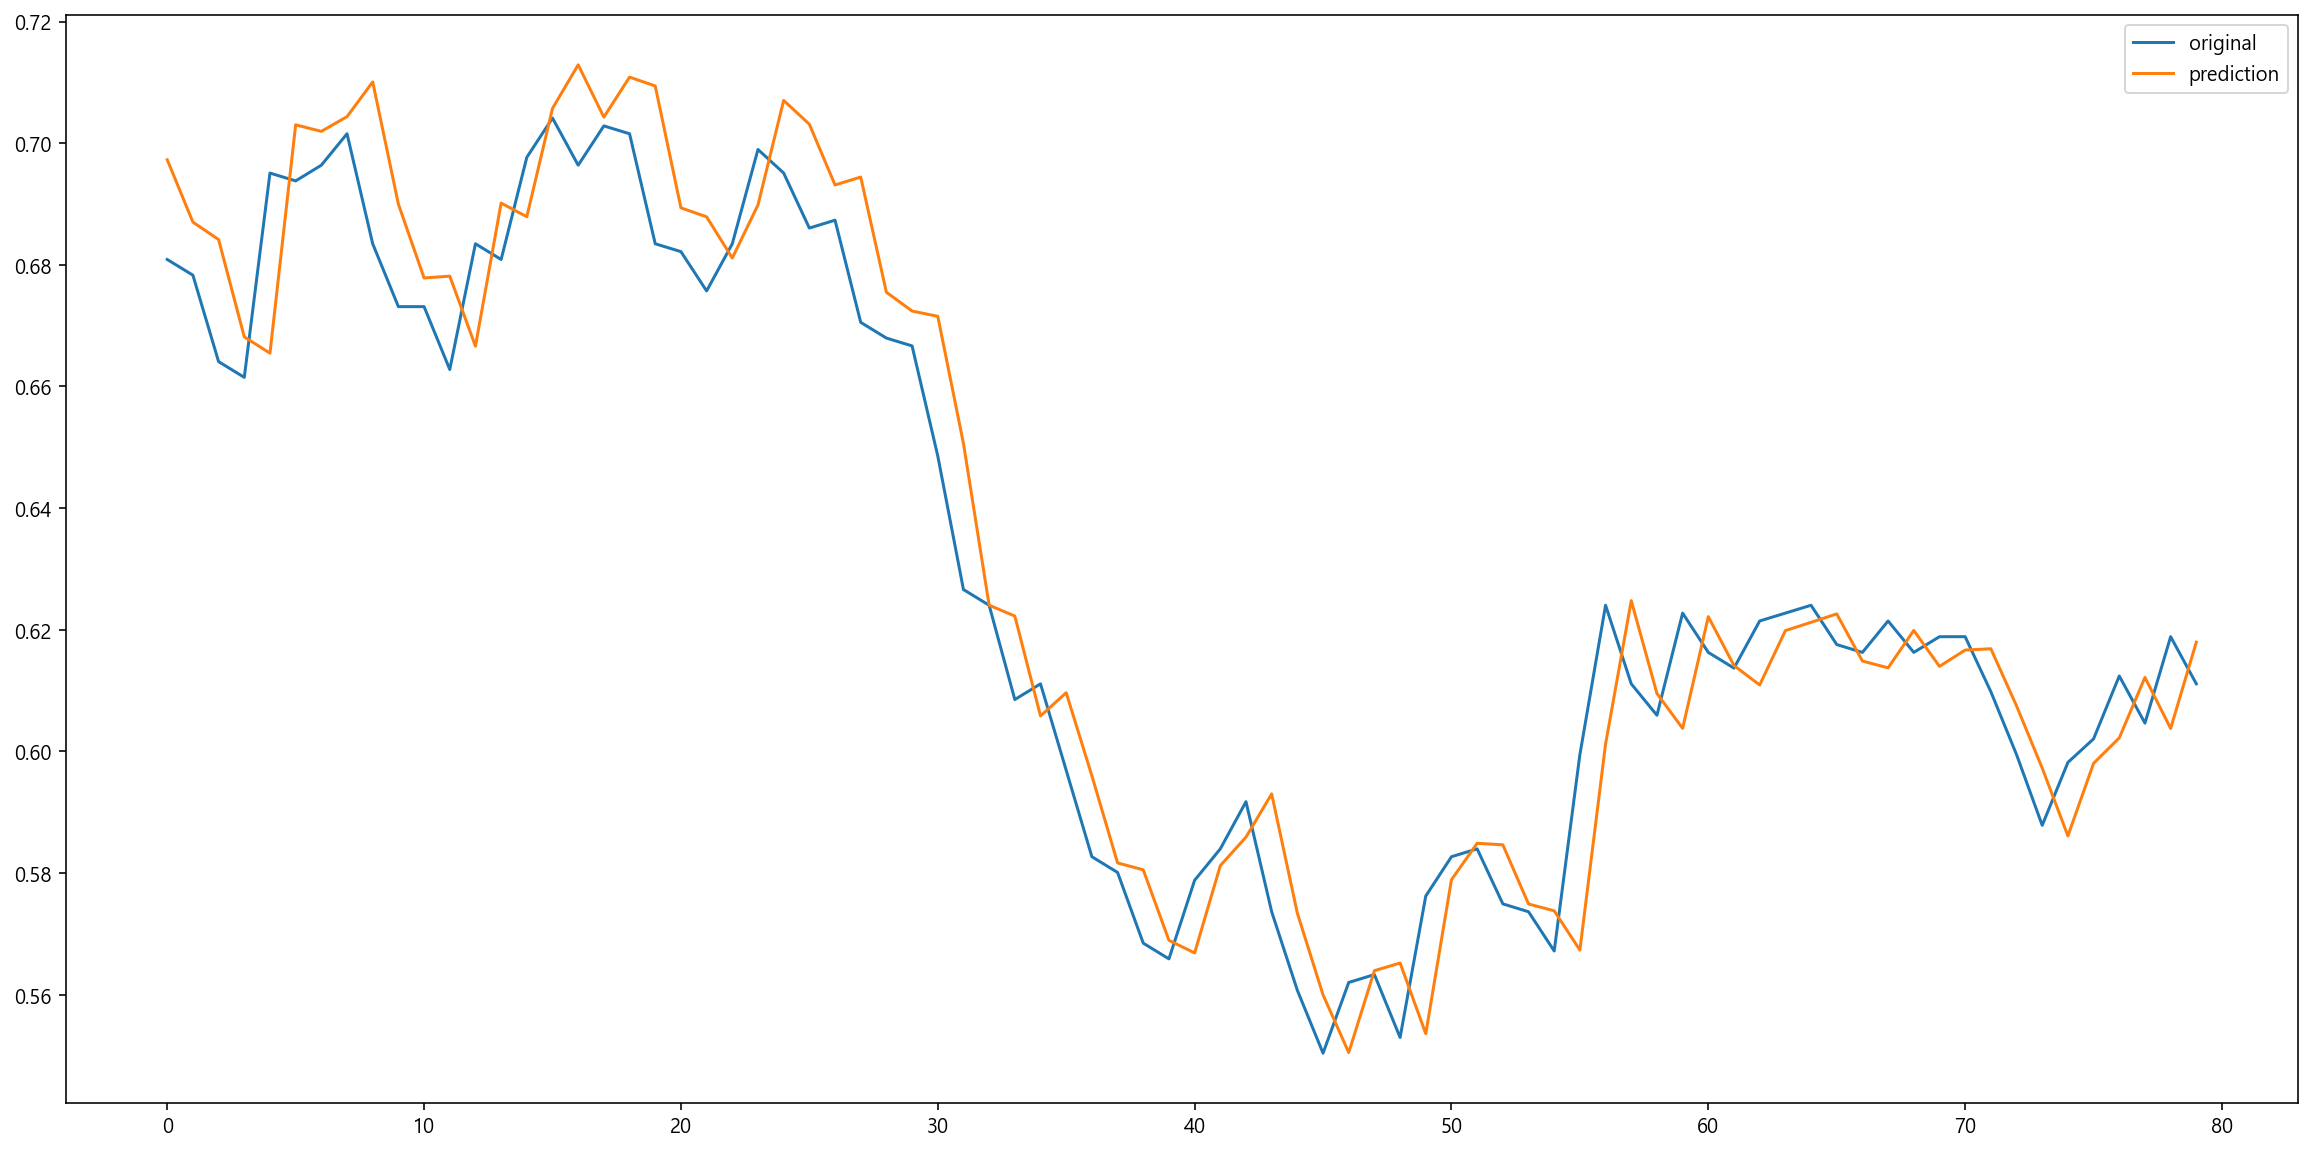

In [34]:
plt.figure(figsize=(20,10))
plt.plot(y_test2, label='original')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()